## Waffle plot  and WordCloud

### import required libraries :

In [9]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays
import js
import io

In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


### clean up data:

In [24]:
df_can.drop(['Type','Coverage','AREA','REG','DEV'], axis = 1, inplace = True)
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace = True)
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))

<ipython-input-24-eb9f05cfd9e2>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] =  df_can.sum (axis = 1)


In [25]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


### Waffle Plot

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [27]:
#create a new DataFrame with 3 nordic countries
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

#### Step1: Determine the proportion of each category respect to total

In [29]:
total = df_dsn['Total'].sum()
cat_portion = df_dsn['Total']/total
pd.DataFrame({"Category Proportion": cat_portion})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


#### Step 2: Define the total size of waffle chart

In [30]:
width = 40 # width of chart
height = 10 # height of chart
total_num_tiles = width * height # total number of tiles
print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


#### Step 3: The third step is using the proportion of each category to determine it respective number of tiles

In [32]:
tile_number = (cat_portion*total_num_tiles).round().astype(int)
pd.DataFrame({"Number of tiles": tile_number})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


#### Step 4: Creating a matrix that resembles the waffle chart and populating it

In [49]:
waffle_chart = np.zeros((height,width),dtype = np.uint)

category_index = 0
tile_index = 0 

for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index> sum(tile_number[0:category_index]):
            category_index += 1
            
        waffle_chart[row,col] = category_index

#### Step 5: Map the waffle chart matrix into a visual

<Figure size 432x288 with 0 Axes>

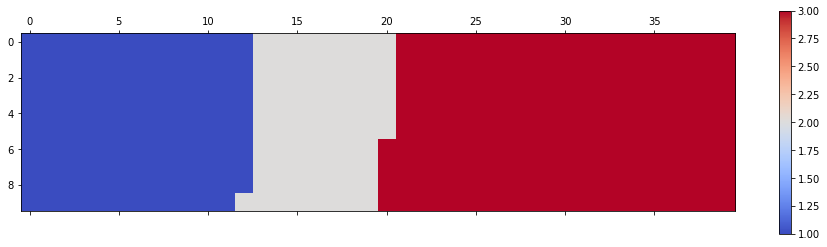

In [50]:
figure = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
plt.show()

#### step 7: prettify the charts & add legend

<Figure size 432x288 with 0 Axes>

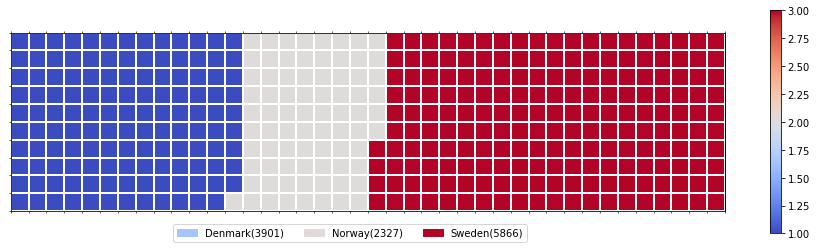

In [68]:
figure = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

#prettify
ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
ax.grid(which='minor',color = 'w', linestyle = '-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum)-1]
#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category +'('+ str(df_dsn['Total'][i]) +')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color = color_val, label= label_str))

#add legend
plt.legend(handles = legend_handles, loc = 'lower center',
          ncol = len(df_dsn.index.values),
          bbox_to_anchor = (0.,-0.2,0.95,.1))


plt.show()